# Foster and  Chevalier setup 

Foster and Chevalier (1993) sets up an isothermal sphere that has constant external pressure on its outer edge. The density on the outside is decreased so that the sound speed in the outer region is 1000 times larger than the sound speed inside the inner region. 

 $$P =\rho C_s^2 \rightarrow \rho_{out} = 10^{6} \rho_{edge}$$ 
 
 where $\rho_{edge}$ is the density at the edge of the cloud. Since the Lane-Emden solution is monotonically decreasing, this is simply the minimum density of the sphere, which is $7.31\times 10^{-22}$ for our setup. By the ideal gas law $T_{out}=10^6T_{in} = 10^7K$. 

In [34]:
from yt.units import g,cm,K,s
from yt.utilities.physical_constants import kboltz , mp,G

In [20]:
rho_edge  = 7.312078754161586E-022*g/cm**3
print "rho_out = ",rho_edge*1e6

rho_out =  7.31207875416e-16 g/cm**3


Therefore, to find P_out
 $$P_{out}=P_{edge} =  \Bigg(\frac{\rho_{edge} k T_{in}}{m_p}\Bigg) $$

In [19]:
T_in = 10*K
print "P_out =", rho_edge*(kboltz*T_in/mp)

P_out = 6.03166654669e-13 erg/cm**3


The inside density $\rho(r)$ is simply given by the Lane-Emden equation times $\rho_c =1.1\times10^{-19} g/cm^3$ corresponding to the initial cloud density in Larson (1969). The inside pressure is obtained by ideal gas law using the observational value for $T_{in}=10K$, 
$$P_{inside}=\Bigg(\frac{\rho kT_{in}}{m_p}\Bigg)$$

In [27]:
print "P_in = rho*%.2e"%(kboltz*T_in/mp)

P_in = rho*8.25e+08


In the linear interpolation part of the code, we compute the values using the non-dimensional radius scheme: 

$$\xi =\Bigg[ \Bigg(\frac{\sqrt{4\pi G\rho_c}}{a}\Bigg)\Bigg]r $$ where a = 28731cm/s. is sound speed (computed from $T_{in}$=10K)



In [36]:
rho_c = 1.1e-19
c_s = 28730*cm/s
print "rc = %.3e rr"%(sqrt(4*pi*G*rho_c)/c_s)

rc = 1.057e-17 rr


# Sphere Fattening

Using the Foster and Chevalier setup, we find that the code takes a long time to track the full evolution of the sphere, because the extremely high temperature outside ($10^7K$) cause the sound speed to be very high, so the code has to be more careful by taking smaller timesteps to resolve fast-moving waves. So, we decided to make outside temperature cooler to speed up the calculation. Since we still have to maintain the condition that $P_{edge} = P_{out}$, so that implies that if the outside temperature decreasess then the density must increase accordingly. This is why we call the process "fattening", as we multiply the density everywhere in the simulation by a ``fattening_factor``.

In [1]:
%pylab inline
import yt
yt.mylog.setLevel(50)

Populating the interactive namespace from numpy and matplotlib


In [77]:
# Loading in the non-dimensionalized density values from solving the Lane-Emden equation
D = np.loadtxt("../data/density.txt")

xi_max= 16.9 # radius of sphere
rho_c = 1.1e-19 #central density of sphere
fattening_factor =100 #factor to enhance the density everywhere by

rho_edge = rho_c*dens[int(xi_max*100)] #physical density at the edge of the sphere (1 xi =100 index array values)
print "After fattening, edge of sphere is: ",fattening_factor*rho_edge

After fattening, edge of sphere is:  7.30195258565e-20


Outside the sphere, the density should drop by a factor of 150 (rather than $10^6$ as in the FC case): 

In [80]:
rho_out = fattening_factor*rho_edge/150.
print "Density outside of the sphere is: ",rho_out

Density outside of the sphere is:  4.86796839043e-22


# Simulation Results:

This is a radial density plot that illustrates how the fattened sphere setup looks like: 

In [38]:
# Loading in data from the simulation and creating a spherical radial profile 
pf = yt.load("../../data_astroSim/data/sphere_hdf5_chk_0000")
sp = pf.sphere(pf.domain_center, (1.5,"pc"))
rp = yt.create_profile(sp,'radius','density')

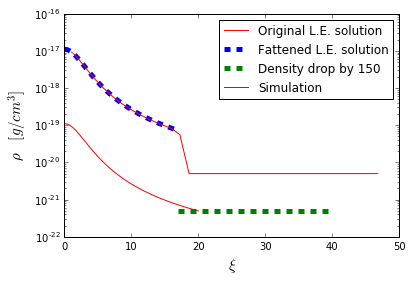

In [76]:
xi = np.arange(1e-6, 20, 0.01) #start at small poisitive number to avoid div-by-0
plt.semilogy(xi,rho_c*D,label ='Original L.E. solution',color="red")#$\rho$')
plt.semilogy(xi[:int(xi_max*100)],fattening_factor*rho_c*D[:int(xi_max*100)],linewidth=5,linestyle="--",label ='Fattened L.E. solution')
xi_out = np.arange(xi_max,40)
plt.semilogy(xi_out,rho_out*ones_like(xi_out),linewidth=5,linestyle="--",label ='Density drop by 150')
sim_xi = rp.x.value*1.05e-17 #xi values from the simulation
sim_dens = rp["density"].in_units("g/cm**3").value #density values from the simulation
plt.semilogy(sim_xi,sim_dens,label="Simulation")

plt.xlabel(r"$\xi$",fontsize=15)
plt.ylabel(r"$\rho \quad  [g/cm^3]$",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

 Since the Lane-Emden solution is self simmilar, multiplying the inside density by a constant factor would not matter. The original outside density is already very low ($\approx 10^{-21} g/cm^3$ ), so multiplying it by a ``fattening_factor`` should not affect the sphere's behaviour by much.

In [3]:
cd ..

/global/u2/d/dorislee/astroSim-tutorial


In [4]:
from scripts.plotSim import *

/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
cd ~/proj/dlee/FLASH4.3/object/

/global/project/projectdirs/astro250/dlee/FLASH4.3/object



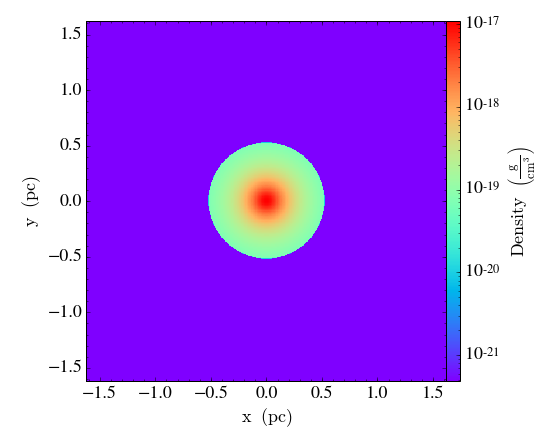

In [6]:
plot_dens(0)

The temperature outside is only a factor of  ``fattening_factor`` more than the inside of the sphere, which is less extreme than the $10^7$K proposed by Foster and Chevalier: 


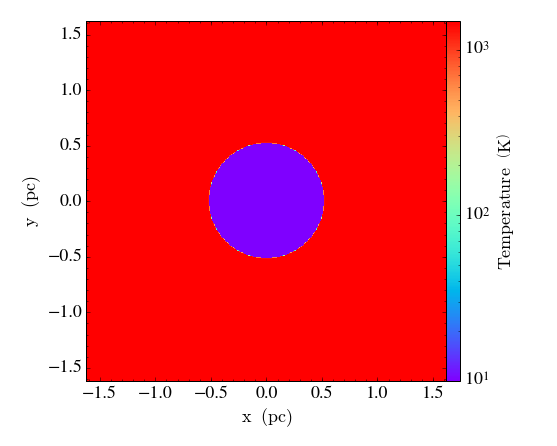

In [7]:
plot_var(0,"temperature")

For a visual check, in the pressure plot the outer region of the dense core should be the same color as the ambient, since $P_{out}=P_{edge}$.


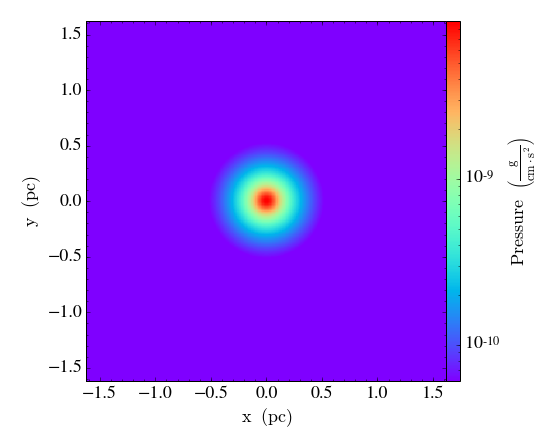

In [8]:
plot_var(0,"pressure")


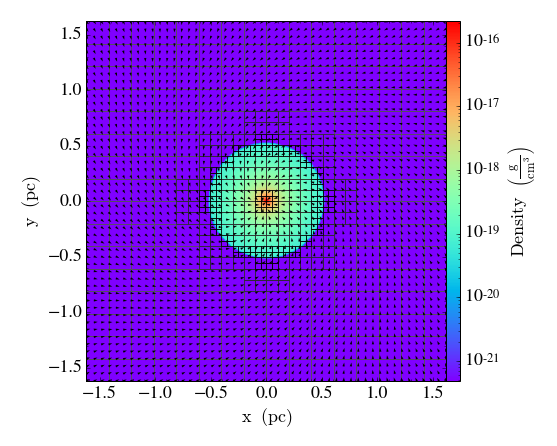

In [90]:
plot_dens(65,"sphere",grid=True,velocity=True)

# Free fall time 

To estimate how long your simulation is going to take, use the free fall time as an order-of-magnitude estimate: 

$$t_{ff} = \sqrt{\frac{3\pi}{32G\rho}}$$

We could check that this agrees with the ``ds.current_time`` of the last timestep in the simulation.

## Reference: 

[1] P. N. Foster, R. A. Chevalier. Gravitational Collapse of an Isothermal Sphere. ApJ 416, 303-311 (1993).

[2] R. B. Larson. Numerical Calculations of the Dynamics of a Collapsing Proto-Star. MNRAS 145, 271–295 (1969). [Link](http://mnras.oxfordjournals.org/content/145/3/271)